<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/03_v2_Computervision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets

CNN's are known for thier capabilities to find pattern in visual data.

To find out what's happening inside CNN, website: https://poloclub.github.io/cnn-explainer/

In [1]:
# Import PyTorch
import torch
from torch import nn

# import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import Matplotlib for visualization
import matplotlib.pyplot as plt

In [2]:
# Setting up training data

train_data=datasets.FashionMNIST(
    root = "data",            # where to download data to?
    train = True,             # do we want the trining datasets
    download = True,          # do we want to download Y/N?
    transform = ToTensor(),   # how to transform the data? https://docs.pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
    target_transform = None   # how to transform the labels/tragets?
)

test_data= datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.81MB/s]


In [3]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [4]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Trun datasets into interables (batches)
train_dataloader = DataLoader( dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader= DataLoader( dataset=test_data,
                            batch_size= BATCH_SIZE,
                             shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d6229993e50>,
 <torch.utils.data.dataloader.DataLoader at 0x7d62299915d0>)

In [6]:
# Create a convolutional neural network

class FashionMNISTV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model for CNN explainer website.
  """

  def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int
                 ):
        super().__init__()
        self.conv_block_1 = nn.Sequential(              ### combination of different/multiple layer is known as conv_block
                                          # create the conv layer- https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(in_channels=input_shape,          ### where as overal architecture are combine of multiple block
                      out_channels=hidden_units,        ### the deeper and deeper our model get it contain many blocks and more layer are within the blocks
                      kernel_size=3,     ## it can be tuple as (3,3) also its similar
                      stride=1,
                      padding=1),         # the values that we can set ourselves in our NN are called hyperparameter
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      ## *7*7 it is the thing that we need to know as we know that the output on conv_block_2 is [1,10,7,7]
                      ## and flatten convert it to [1,490], sooo
                      ## now the hidden unit is 10 and multiplying it with 7*7 matches the input and output shape
                      out_features=output_shape)
        )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Shape of classifier: {x.shape}")
    return x                ## replicating the code to the website linked above


In [7]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

In [8]:
image, lable = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [9]:
model_2(image.unsqueeze(dim=0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 1.1 Steeping through `nn.Conv2d()`

Docs - https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html



In [10]:
torch.manual_seed(42)

# Creating the batches of images

images = torch.rand(size=(32,3,64,64))
test_image= images[0]

print(f"Image batch shape: {images.shape}\nTest or single image shape: {test_image.shape}")
test_image

Image batch shape: torch.Size([32, 3, 64, 64])
Test or single image shape: torch.Size([3, 64, 64])


tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307, 0.2847,  ..., 0.8432, 0.8307, 0.0897],
         [0.7021, 0.5967, 0.7744,  ..., 0.8485, 0.4520, 0.

In [11]:
torch.manual_seed(42)
# Create the random single conv2d layer

conv_layer1 = nn.Conv2d(in_channels=3,
                    out_channels=10,
                    kernel_size=3,
                    stride=1,
                    padding=0)

# Pass the data through the convolutional layer

conv_layer1(test_image.unsqueeze(dim=0))  # add the extra dimension at order 0 with 1


tensor([[[[ 0.6552,  0.5381,  0.4456,  ...,  0.3679,  0.1734,  0.2343],
          [ 0.4011,  0.2772,  0.4309,  ...,  0.0474,  0.3547,  0.4406],
          [ 0.5072,  0.6963,  0.3967,  ...,  0.5034,  0.3260,  0.4359],
          ...,
          [ 0.3767,  0.4173,  0.7551,  ...,  0.5548,  0.5815,  0.2547],
          [ 0.4143,  0.6770,  0.5922,  ...,  0.7285,  0.3320,  0.5752],
          [ 0.1725,  0.3980,  0.5999,  ...,  0.4316,  0.5133,  0.3385]],

         [[ 0.0954, -0.0688, -0.1089,  ...,  0.0185, -0.4996, -0.0184],
          [-0.0188, -0.1703, -0.1344,  ..., -0.2991, -0.0339,  0.1632],
          [-0.1585, -0.0837, -0.0159,  ...,  0.0026,  0.1540, -0.1372],
          ...,
          [-0.0297, -0.0980, -0.0731,  ...,  0.0623, -0.1080, -0.0946],
          [-0.1508, -0.1934,  0.2011,  ...,  0.0415, -0.0989,  0.2556],
          [ 0.0447,  0.1020, -0.1685,  ...,  0.0908, -0.0682, -0.2266]],

         [[ 0.0098,  0.1790,  0.3092,  ...,  0.2502,  0.2292, -0.0542],
          [-0.0979,  0.1598,  

In [12]:
## copying the function from the previous notebook

# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

# Creating the function for training and testing loop

def training_loop(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device = device):

  ###Performs a training loop for a PyTorch model.###
  train_loss, train_acc = 0, 0

  # putting model into training mode
  model.train()

  # Loop through the training batches **********************************************************************
  for batch, (X, y) in enumerate(data_loader):

    #Put data on traget device
    X,y= X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss   # accumulate the train loss and avg is found at last
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out what is happening
    if batch % 500 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train loss: {train_loss:.5f} |  Train accuracy: {train_acc:.2f}%")


def testing_loop(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  accuracy_fn,
                  device: torch.device = device):

  ### Performs a testing loop for a model

  test_loss, test_acc = 0, 0

  # putting into evaluation mode
  model.eval()

  # truning on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:     ## we can only use X,y insted of X-test,y_test as we are inside the function

      # Set the data to the target device
      X, y = X.to(device), y.to(device)

      # Forward pass
      test_pred = model(X)

      # Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calulate loss and accuracy per batches for test data
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Vusualization
    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    ### Returns a dictionary containing the results of model predicting on data_loader

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Make predictions
            y_pred = model(X)


            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scle loss and acc to find the average loss/acc per batch

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model was created with a class
            "model_loss": loss.item(),             # .item() change to single form
            "model_acc": acc}

### 1.2 Stepping through `nn.MaxPool2d()

doc- https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#maxpool2d

In [13]:
test_image.shape

torch.Size([3, 64, 64])

In [14]:
# print out orginal image shape without unsqueezed dimension
print(f"Test image orginal shape: {test_image.shape}\n")
print(f"Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}\n")

# Sample nn.Maxpool2d layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)

print(max_pool_layer(test_image.unsqueeze(dim=0)).shape)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer1(test_image.unsqueeze(dim=0))
print(f"\nShape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"\nShape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image orginal shape: torch.Size([3, 64, 64])

Test image unsqueezed shape: torch.Size([1, 3, 64, 64])

torch.Size([1, 3, 32, 32])

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])

Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


### 1.3 Setup accuracy(evaluation function), loss function and optimizer

In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [16]:
# Setup loss_fn/optimizer/accuracy_fn



loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [17]:
from timeit import default_timer as timer
def print_train_time( start: float,
                      end: float,
                      device: torch.device = None):
  """Prints difference between start and end time."""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 1.4 Training and testing CNN model using our functions

In [18]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm

# Measure time
train_time_start = timer()

# Starting a loop
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  training_loop(model = model_2,
                data_loader = train_dataloader,
                loss_fn= loss_fn,
                optimizer= optimizer,
                accuracy_fn= accuracy_fn,
                device= device)
  testing_loop(model = model_2,
                data_loader = test_dataloader,
                loss_fn= loss_fn,
                accuracy_fn= accuracy_fn,
                device= device)

train_time_end = timer()
print_train_time(train_time_start, train_time_end, device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.59518 |  Train accuracy: 78.38%
Test loss: 0.39500, Test acc: 85.99%

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.36536 |  Train accuracy: 86.90%
Test loss: 0.35244, Test acc: 86.91%

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.32588 |  Train accuracy: 88.13%
Test loss: 0.32719, Test acc: 88.07%

Epoch: 3
--------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.30489 |  Train accuracy: 88.92%
Test loss: 0.32312, Test acc: 88.25%

Epoch: 4
--------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 sa

281.974648625

In [19]:
# Get CNN model results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             )
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.3083638548851013,
 'model_acc': 88.90774760383387}

We can compare results from different 3 model using pandas

## 2. Make and evaluate random prediction with model

In [20]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs= []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = sample.unsqueeze(dim=0).to(device)

      #Forward pass (model output raw logits)
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get prediction label
      pred_label = torch.argmax(pred_prob)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to trun list to tensor
  return torch.stack(pred_probs)



In [21]:
import random
# random.seed(42)
test_sample = []
test_label = []
for sample, lable in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_label.append(lable)

# View the first sample shape
test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

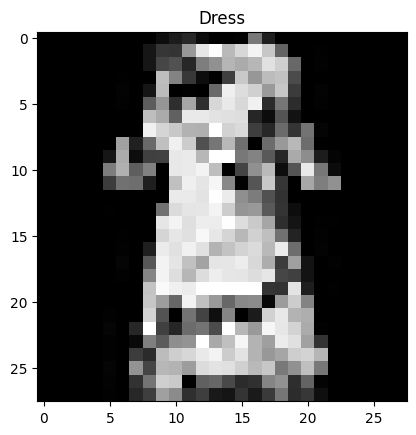

In [22]:
plt.imshow(test_sample[0].squeeze(), cmap="gray")
plt.title(class_names[test_label[0]])

In [23]:
from os import pread
# Make_predictions
pred_probs = make_predictions(model=model_2,
                              data=test_sample)
pred_probs[:2]

tensor([[2.3536e-02, 5.1900e-06, 7.9843e-05, 9.7207e-01, 3.6589e-04, 1.4044e-06,
         3.3096e-03, 2.1091e-06, 6.3442e-04, 1.6528e-07],
        [2.7897e-07, 4.4824e-08, 1.4664e-07, 1.0128e-07, 9.9488e-09, 7.4149e-05,
         7.2001e-07, 9.6541e-05, 3.1891e-05, 9.9980e-01]])

In [24]:
test_label

[3, 9, 1, 5, 1, 0, 1, 0, 5]

In [25]:
# Convert prediction probabilities to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([3, 9, 1, 5, 1, 0, 1, 0, 5])

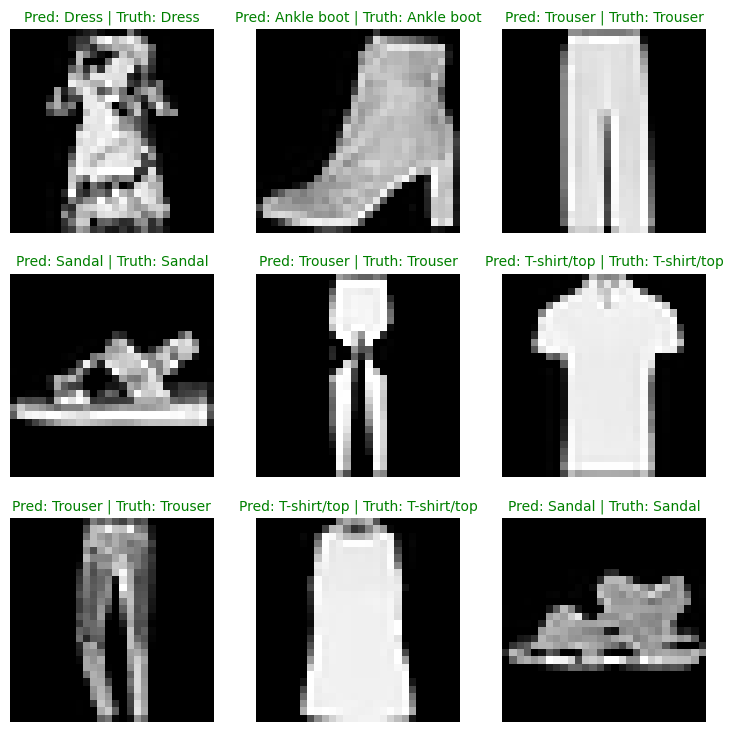

In [26]:
# Plot prediction
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create the subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction ( in text format, eg: bag)
  pred_label= class_names[pred_classes[i]]

  # Get th truth lable (in text form)
  truth_label= class_names[test_label[i]]

  # Create the title text of the plot
  plt.title(f"Pred: {pred_label} | Truth: {truth_label}")

  # check for equality between pred and truth and change color of titel text

  if pred_label == truth_label:
    plt.title(f"Pred: {pred_label} | Truth: {truth_label}",
              fontsize=10,color="green")      # green text if prediction same as truth
  else:
    plt.title(f"Pred: {pred_label} | Truth: {truth_label}",
                fontsize=10,color="red")        # red text if prediction not same as truth

  plt.axis(False);


As we can see that the model is quite confused in some predictions like T-shirt/top and shirt -> so we need to create the confusion matrix

## 3. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models
https://docs.pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html

1. Make prediction wih our trained model on the test data.
2. Make a confusion matirx `torchmetrics.ConfusionMatrix`
https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. PLot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()` -
https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/


| **torch.cat**                      | **torch.stack**                        |
| ---------------------------------- | -------------------------------------- |
| Joins along existing dimension     | Creates **new dimension**              |
| Does NOT increase tensor rank      | Increases tensor rank by 1             |
| `dim` refers to existing dimension | `dim` refers to new dimension position |


In [27]:
# Import tqdm.auto https://tqdm.github.io/
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
y_true = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making prediction............."):
    # Send the data and tragets to trageted device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logits = model_2(X)
    # Get the prediction labels
    y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of prediction into tensor
print(f"Number of prediction: {len(y_preds)}")
print(f"\n {y_preds[:3 ]} ................. {y_preds[310:]}")
y_pred_tensors = torch.cat(y_preds)  ## it can list of tensor to single tensor
y_pred_tensors


Making prediction.............:   0%|          | 0/313 [00:00<?, ?it/s]

Number of prediction: 313

 [tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 6, 9, 6, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 7, 6, 7, 2, 1, 4, 2, 4, 4, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 2])] ................. [tensor([8, 8, 9, 8, 3, 8, 9, 3, 2, 0, 2, 1, 8, 4, 4, 6, 6, 9, 5, 3, 1, 5, 1, 3,
        5, 6, 6, 2, 1, 7, 3, 6]), tensor([8, 2, 9, 3, 9, 0, 3, 4, 1, 4, 6, 4, 3, 1, 4, 9, 7, 3, 2, 6, 0, 9, 7, 8,
        5, 0, 9, 6, 0, 3, 6, 1]), tensor([3, 2, 7, 5, 6, 4, 5, 6, 8, 9, 1, 9, 1, 0, 1, 2])]


tensor([9, 2, 1,  ..., 0, 1, 2])

In [28]:
len(y_pred_tensors)  # must be number of total test data

10000

### Useful coding for installing the package

In [29]:
# See if required package are installed/not, installing them
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics  -U mlxtend # -q for installiing quitely and -U for the upgrade
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 791.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.5 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [30]:
mlxtend.__version__

'0.23.4'

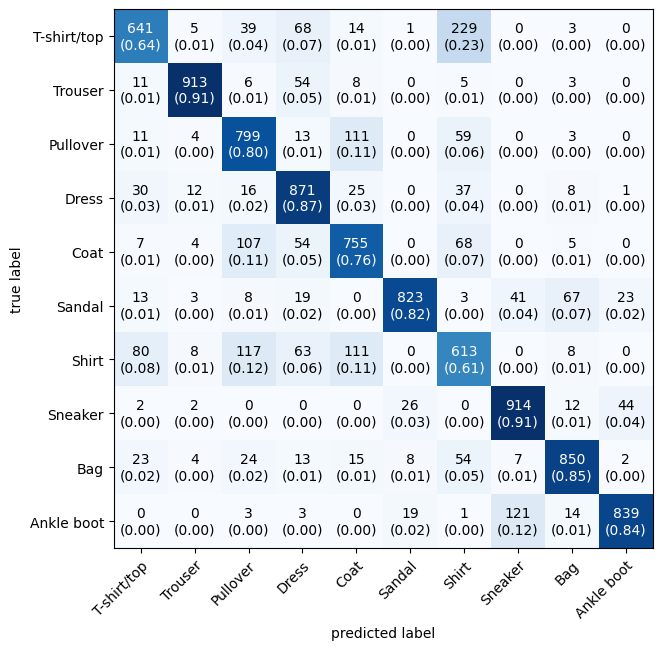

In [31]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to tragets
confmat= ConfusionMatrix(task="multiclass", num_classes= len(class_names))
confmat_tensor = confmat(preds=y_pred_tensors,
                         target=test_data.targets
                         )

# 3. Plot the confusion matrix
fig, ax= plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               show_normed=True,
                               figsize=(7,7),
                               class_names=class_names,
)


we can visualize the confusion matix to see the error in prediction created by our model. this is because our labels are quuite confusing and we need to define our parameter relevantly in further projects too.

## 4. Save and load model

In [32]:
from pathlib import Path

# Create model dictory path
MODEL_PATH= Path('MODELS')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "CNN_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: MODELS/CNN_model.pth


we save the model state dict so that we can later use this of make predicttion.

In [33]:
# Create the new instance
torch.manual_seed(42)

loaded_model_2= FashionMNISTV2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_names)).to(device)

# Load the saved model state dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# send the model to the traget device
loaded_model_2.to(device)

FashionMNISTV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    )

loaded_model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.3083638548851013,
 'model_acc': 88.90774760383387}

In [35]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.3083638548851013,
 'model_acc': 88.90774760383387}

In [37]:
# we can also check if model results are close to eachother or not

torch.isclose(torch.tensor(model_2_results["model_loss"]), # Convert float to tensor
              torch.tensor(loaded_model_2_results["model_loss"]), # Convert float to tensor
              atol=1e-02) # Corrected the scientific notation from le-02 to 1e-02 and parameter name from alot to atol

tensor(True)